In [1]:
import numpy as np
import pandas as pd
import pickle
import pefile
import joblib
import os 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
MalwareDataset = pd.read_csv('../Dataset/data.csv', sep='|')

In [3]:
Legit = MalwareDataset[MalwareDataset['legitimate'] == 1].drop(['Name', 'md5', 'legitimate'], axis=1)
Malware = MalwareDataset[MalwareDataset['legitimate'] == 0].drop(['Name', 'md5', 'legitimate'], axis=1)


In [4]:
Legit

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,...,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,...,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,...,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41318,332,224,8450,8,0,946176,159744,0,808471,4096,...,0,123,2.607251,0.960953,5.130762,327.170732,20,1592,72,16
41319,332,224,8450,8,0,946176,154624,0,808738,4096,...,0,123,2.607232,0.960953,5.130762,327.235772,20,1592,72,16
41320,332,224,8450,8,0,53248,16384,0,54048,4096,...,25,1,3.524268,3.524268,3.524268,892.000000,892,892,72,16
41321,332,224,8450,8,0,52736,11264,0,53530,4096,...,25,1,3.542071,3.542071,3.542071,892.000000,892,892,72,16


In [5]:
Malware

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
41323,332,224,258,11,0,354816,257024,0,183632,4096,...,0,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0
41324,332,224,271,6,0,24064,164864,1024,12538,4096,...,0,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15
41325,332,224,258,10,0,118784,381952,0,59914,4096,...,0,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14
41326,332,224,258,10,0,174592,300032,0,117140,4096,...,0,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14
41327,332,224,258,9,0,475648,348672,0,319769,4096,...,0,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,0,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,0,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,0,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,0,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0


In [6]:
print(f'The number of important features is: {Legit.shape[1]} \n')
print(MalwareDataset.sample(10))

The number of important features is: 54 

                                               Name   
49561   VirusShare_b6a617f9edcaf75b4e6a223df074934c  \
39835        api-ms-win-core-interlocked-l1-1-0.dll   
76643   VirusShare_4ff786410ac339e5b2e1c5d1a85be918   
114120  VirusShare_858ad12e2c70bb1738f07878d6a92fd8   
28660                                    InkObj.dll   
82950   VirusShare_cfb07ce168e2ffecd91e96f908afe59e   
117473  VirusShare_658558d90050bb8613201eae41747cc7   
55212   VirusShare_72f695b22adb3ea006b03da67b8bd1df   
60993   VirusShare_675cda2af0bbd4848ad7581d8a024903   
115053  VirusShare_acfc790b41f6a82eaca6d8b7ecc1a58e   

                                     md5  Machine  SizeOfOptionalHeader   
49561   b6a617f9edcaf75b4e6a223df074934c      332                   224  \
39835   88c6520d84b8955ec5c3cff7e18d0a04      332                   224   
76643   4ff786410ac339e5b2e1c5d1a85be918      332                   224   
114120  858ad12e2c70bb1738f07878d6a92fd8      332   

In [7]:
cat_cols = ["Machine", "Characteristics", "MajorLinkerVersion", "MinorLinkerVersion", "SectionAlignment",
            "FileAlignment", "MajorOperatingSystemVersion", "MinorOperatingSystemVersion", 
            "MajorImageVersion", "MinorImageVersion", "MajorSubsystemVersion", "MinorSubsystemVersion", 
            "Subsystem", "LoaderFlags"]

Malware_cat = pd.get_dummies(MalwareDataset[cat_cols], columns=cat_cols)
MalwareDataset = MalwareDataset.drop(cat_cols, axis=1)
MalwareDataset = MalwareDataset.merge(Malware_cat, left_index=True, right_index=True)

In [8]:
features_df = MalwareDataset.drop(['Name', 'md5', 'legitimate'], axis=1).loc[:, (MalwareDataset != MalwareDataset.iloc[0]).any()]


In [9]:
num_cols = [col for col in features_df.columns if col not in Malware_cat.columns]
features_df[num_cols] = (features_df[num_cols] - features_df[num_cols].min()) / (features_df[num_cols].max() - features_df[num_cols].min())


In [10]:
Labels = MalwareDataset["legitimate"]
rus = RandomUnderSampler()
features_df, Labels = rus.fit_resample(features_df, Labels)


In [11]:
MalwareDataset = features_df.merge(Labels, right_index=True, left_index=True)


In [12]:
Data = MalwareDataset.drop(['legitimate'], axis=1).values
Target = MalwareDataset['legitimate'].values
FeatSelect = ExtraTreesClassifier().fit(Data, Target)
Model = SelectFromModel(FeatSelect, prefit=True)
Data_new = Model.transform(Data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Data_new, Target, test_size=0.13, random_state=42)


In [14]:
rf_clf = RandomForestClassifier(n_estimators=5200, max_depth=50)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=5200)

In [15]:
score = rf_clf.score(X_test, y_test)
print(f"Random Forest score is: {score * 100:.2f}%")


Random Forest score is: 99.52%


In [16]:
y_pred = rf_clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)

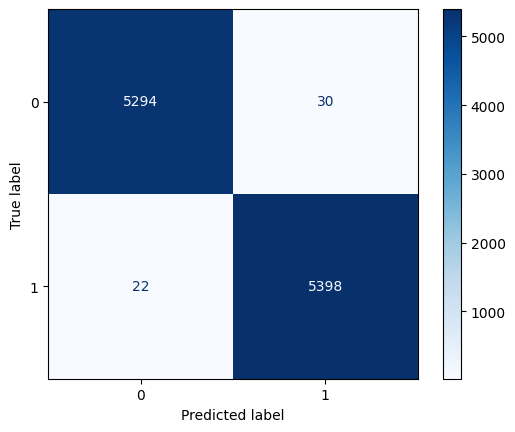

False positive rate: 0.56%
False negative rate: 0.41%


In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(f"False positive rate: {(CM[0][1] / float(sum(CM[0])))*100:.2f}%")
print(f"False negative rate: {(CM[1][0] / float(sum(CM[1])))*100:.2f}%")

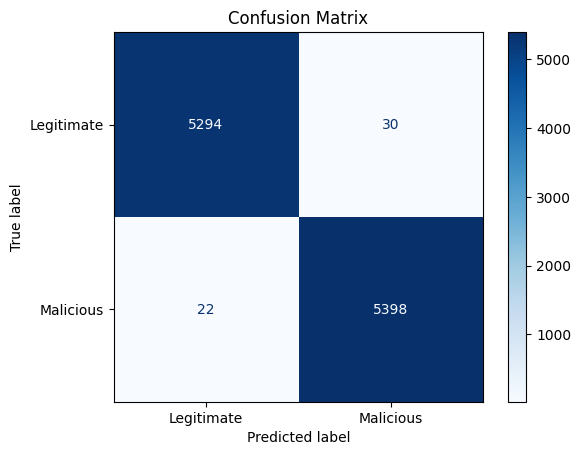

                 Label  Count
0  Legitimate Detected   5294
1   Malicious Detected   5398
2      False Negatives     30


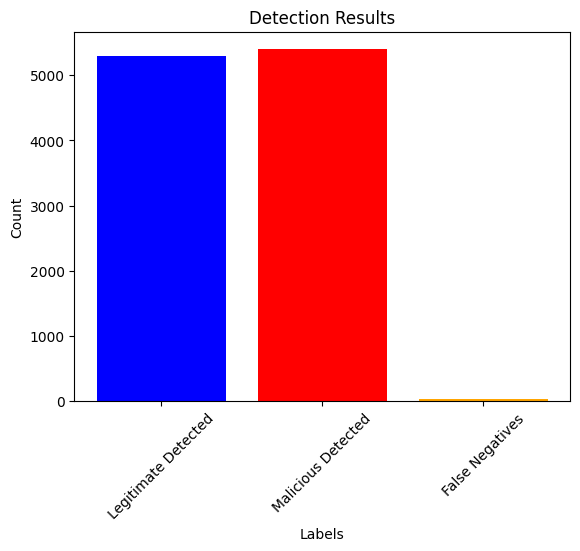

In [18]:

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=["Legitimate", "Malicious"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


benign_count = (y_test == 0).sum()
malicious_count = (y_test == 1).sum()
benign_detected = ((y_test == 0) & (y_pred == 0)).sum()
malicious_detected = ((y_test == 1) & (y_pred == 1)).sum()
benign_false_negative = ((y_test == 0) & (y_pred == 1)).sum()


results_df = pd.DataFrame({
    'Label': ['Legitimate Detected', 'Malicious Detected', 'False Negatives'],
    'Count': [benign_detected, malicious_detected, benign_false_negative]
})

print(results_df)


labels = ['Legitimate Detected', 'Malicious Detected', 'False Negatives']
counts = [benign_detected, malicious_detected, benign_false_negative]

plt.bar(labels, counts, color=['blue', 'red', 'orange'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Detection Results')
plt.xticks(rotation=45)
plt.show()

In [19]:
def display_results(y_true, y_pred):
    results = []

    for i in range(len(y_true)):
        label = "Malicious" if y_true[i] == 1 else "Legitimate"
        prediction = "Malicious" if y_pred[i] == 1 else "Legitimate"
        results.append({
            'Actual': label,
            'Predicted': prediction
        })

    results_df = pd.DataFrame(results)
    print(results_df)


display_results(y_test, y_pred)

           Actual   Predicted
0      Legitimate  Legitimate
1       Malicious   Malicious
2       Malicious   Malicious
3      Legitimate  Legitimate
4       Malicious   Malicious
...           ...         ...
10739  Legitimate  Legitimate
10740  Legitimate  Legitimate
10741   Malicious   Malicious
10742   Malicious   Malicious
10743  Legitimate  Legitimate

[10744 rows x 2 columns]


In [20]:
joblib.dump(rf_clf, 'classifier.pkl')
with open('features.pkl', 'wb') as f:
    pickle.dump(Model.get_support(indices=True), f)

In [21]:
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)

    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode

    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0

    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
    res['SectionsNb'] = len(pe.sections)

    entropy = [section.get_entropy() for section in pe.sections]
    res['SectionsMeanEntropy'] = sum(entropy) / float(len(entropy)) if entropy else 0
    # for key, value in res.items():
    #     print(f"{key}: {value}")
    return res

In [22]:
def analyze_pe_file(file_path):
    with open(file_path, 'rb') as file:
        temp_file_path = file_path

    try:
        clf = joblib.load('classifier.pkl')
        features_list = pickle.load(open('features.pkl', 'rb'))

        data = extract_infos(temp_file_path)
        # print("Extracted data:", data)
        pe_features = [feature for feature in features_list if str(feature) not in data]
        # print("Extracted features:", pe_features)
        # print("Number of features extracted:", len(pe_features))
        EXPECTED_FEATURES_COUNT = len(pe_features)
        if len(pe_features) != EXPECTED_FEATURES_COUNT:
            raise Exception(f"Expected {EXPECTED_FEATURES_COUNT} features, but got {len(pe_features)}")


        result = clf.predict([pe_features])[0]
        return result  # 0: Legitimate, 1: Malicious

    except Exception as e:
        raise Exception(f"Error processing PE file: {str(e)}")


In [23]:
def display_results(y_true, y_pred):
    results = []

    for i in range(len(y_true)):
        label = "Malicious" if y_true[i] == 1 else "Legitimate"
        prediction = "Malicious" if y_pred[i] == 1 else "Legitimate"
        results.append({
            'Actual': label,
            'Predicted': prediction
        })

    results_df = pd.DataFrame(results)
    print(results_df)

In [24]:
def test_file(file_path):
    try:
        result = analyze_pe_file(file_path)
        label = "Malicious" if result == 1 else "Legitimate"
        print(f"The file '{file_path}' is classified as: {label}")
    except Exception as e:
        print(f"Error: {str(e)}")

In [25]:
def test_multiple_files(file_paths):
    y_true = []  
    y_pred = []  

    for file_path in file_paths:
        try:
            result = analyze_pe_file(file_path)
            label = "Malicious" if result == 1 else "Legitimate"
            print(f"The file '{file_path}' is classified as: {label}")
            y_true.append(1 if 'malicious' in file_path.lower() else 0)       
            y_pred.append(result)
        except Exception as e:
            print(f"Error processing '{file_path}': {str(e)}")

    display_results(y_true, y_pred)


In [26]:
file_path = 'testapp.exe' 
test_file(file_path)

The file 'testapp.exe' is classified as: Legitimate


In [27]:
file_paths = ['testapp.exe']  
test_multiple_files(file_paths)

The file 'testapp.exe' is classified as: Legitimate
       Actual   Predicted
0  Legitimate  Legitimate
